In [1]:
import pandas as pd

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Create the Prior Knowledge Object

In [4]:
from pycausal import prior as p
forbid = [['TangibilityCondition','Impact']]
require =[['Sympathy','TangibilityCondition']]
tempForbid = p.ForbiddenWithin(['TangibilityCondition','Imaginability'])
temporal = [tempForbid,['Sympathy','AmountDonated'],['Impact']]
prior = p.knowledge(forbiddirect = forbid, requiredirect = require, addtemporal = temporal)
prior

Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
addtemporal

1*  Imaginability TangibilityCondition
2  AmountDonated Sympathy
3  Impact

forbiddirect
TangibilityCondition Impact

requiredirect
Sympathy TangibilityCondition

#### Load causal algorithms from the py-causal library and Run Bootstrapping RFCI

In [5]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.listIndTests()

bdeu-test
cci-test
cg-lr-test
chi-square-test
d-sep-test
disc-bic-test
fisher-z-test
g-square-test
kci-test
mnlrlr-test
mvplr-test
prob-test


In [6]:
tetrad.getAlgorithmParameters(algoId = 'rfci', testId = 'fisher-z-test')

depth: This variable is usually called “depth” for algorithms such as PC in which conditioning sets are considered of increasing size from zero up to some limit, called “depth”. For example, if depth = 3, conditioning sets will be considered of sizes 0, 1, 2, and 3. In order to express that no limit should be imposed, use the value -1. (java.lang.Integer) [default:-1]
maxPathLength: See Spirtes, Glymour, and Scheines (2000), Causation, Prediction, and Search for the definition of discrimination path. Finding discriminating paths can be expensive. This sets the maximum length of such paths that the algorithm tries to find. (java.lang.Integer) [default:-1]
completeRuleSetUsed: For the FCI algorithm, to final orientation rules sets are available, one due to P. Spirtes, guaranteeing arrow completeness, and a second due to J. Zhang, guaranteeing additional tail completeness. If this parameter is set to “Yes,” the tail-complete rule set will be used. (java.lang.Boolean) [default:false]
verbo

In [7]:
tetrad.run(algoId = 'rfci', dfs = df, testId = 'fisher-z-test', 
           priorKnowledge = prior, depth = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True,
           numberResampling = 5, resamplingEnsemble = 1, addOriginalDataset = True)

#### Bootstrapping RFCI Continuous' Result's Nodes

In [8]:
tetrad.getNodes()

['AmountDonated',
 'Imaginability',
 'Impact',
 'Sympathy',
 'TangibilityCondition']

#### Bootstrapping RFCI Continuous' Result's Edges

In [9]:
tetrad.getEdges()

['AmountDonated o-> Sympathy [AmountDonated o-> Sympathy]:0.3333;[AmountDonated o-o Sympathy]:0.3333;[AmountDonated <-- Sympathy dd nl]:0.3333;',
 'Sympathy o-> Impact [Impact <-- Sympathy dd nl]:0.3333;[Impact <-o Sympathy]:0.6667;',
 'Sympathy --> TangibilityCondition [Sympathy --> TangibilityCondition dd pl]:0.3333;[Sympathy --> TangibilityCondition dd nl]:0.6667; dd nl',
 'AmountDonated o-> Impact [AmountDonated o-> Impact]:0.5000;[no edge]:0.5000;',
 'Imaginability o-> Sympathy [Imaginability o-> Sympathy]:0.6667;[no edge]:0.3333;',
 'Imaginability o-> Impact [Imaginability o-> Impact]:0.5000;[Imaginability --> Impact pd pl]:0.3333;[no edge]:0.1667;']

#### Plot The Result's Graph

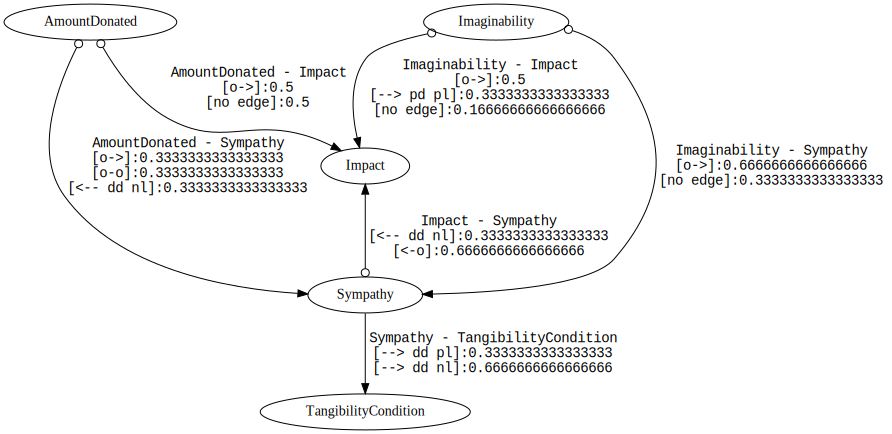

In [10]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

#### Stop Java VM

In [11]:
pc.stop_vm()